In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [2]:
g = np.genfromtxt("../data/G-1.csv", dtype=float, delimiter=",")

In [3]:
H = np.genfromtxt("../data/H-1.csv", dtype="f4", delimiter=",")

In [4]:
def cgne_blas(H, g):
    f = np.zeros(3600, dtype=float)
    r = linalg.blas.sgemv(-1.0, H, f, beta=1.0, y=g)
    p = linalg.blas.sgemv(1.0, H, r, trans=1)
    for i in range(0, 20):
        rdot = linalg.blas.sdot(r, r)
        alpha = rdot/linalg.blas.sdot(p, p)
        f = linalg.blas.saxpy(p, f, a=alpha)
        r = linalg.blas.sgemv(-alpha, H, p, beta=1.0, y=r)
        beta = linalg.blas.sdot(r, r)/rdot
        p = linalg.blas.sgemv(1.0, H, r, beta=beta, y=p, trans=1)
    return f

In [5]:
def cgne(H, g):
    f = np.zeros(3600, dtype=float)
    r = g - H@f #linalg.blas.sgemv(-1.0, H, f, beta=1.0, y=g)
    p = H.transpose() @ r #linalg.blas.sgemv(1.0, H, r, trans=1)
    for i in range(0, 20):
        rdot = np.dot(r, r) #linalg.blas.sdot(r, r)
        alpha = rdot/np.dot(p, p)#linalg.blas.sdot(p, p)
        f = f + alpha*p #linalg.blas.saxpy(p, f, a=alpha)
        r = r - alpha*H@p #linalg.blas.sgemv(-alpha, H, p, beta=1.0, y=r)
        beta = np.dot(r, r)/rdot #linalg.blas.sdot(r, r)/rdot
        p = H.transpose()@r + beta*p #linalg.blas.sgemv(1.0, H, r, beta=beta, y=p, trans=1)
    return f

In [14]:
img1 = cgne(H, g)

In [20]:
img = cgne_blas(H, g)

In [21]:
def view(img):
    i = img.reshape(60, 60).transpose()
    return plt.imshow(i, "gray")

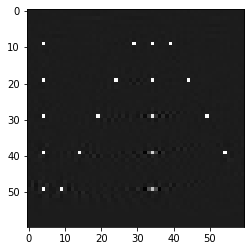

In [22]:
view(img)

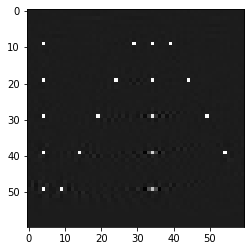

In [23]:
view(img1)

In [24]:
#np.testing.assert_almost_equal(img, img1, decimal=5)